### 4.3.3 Programming the numerical method; the special case

We introduce $u=x$ and $v=x'=u'$ as $two$ new unknown functions. The two corresponding equations arise from the definition $v=u'$ and the original equation $\ddot{x} + \omega ^2 x = 0$.

$$u' = v, \qquad v' = -w^2 u.$$

We can now apply the Forward Euler mehtod,
$$\frac{u^{n+1}-u^{n}}{\Delta t} = v^n,$$
$$\frac{v^{n+1}-v^{n}}{\Delta t} = -\omega^2 u^n, $$

resulting in the computational scheme
$$u^{n+1}=u^{n}+\Delta t v^{n} , $$
$$v^{n+1}=v^{n}-\Delta t \omega^2 u^{n} , $$


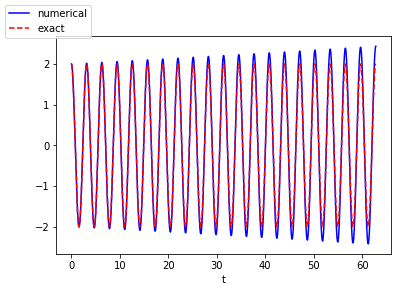

In [9]:
from numpy import zeros, linspace, pi, cos, array
import matplotlib.pyplot as plt

omega = 2
P = 2*pi/omega
dt = P/2000      # P/40, P/160, P/2000 in textbook
T = 20*P
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)

u = zeros(N_t+1)
v = zeros(N_t+1)

# Initial condition
X_0 = 2
u[0] = X_0
v[0] = 0

# Step equations forward in time
for n in range(N_t):
    u[n+1] = u[n] + dt*v[n]
    v[n+1] = v[n] - dt*omega**2*u[n]

fig = plt.figure()
l1, l2 = plt.plot(t, u, 'b-', t, X_0*cos(omega*t), 'r--')
fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
plt.xlabel('t')
#plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

Since we already know the exact solution as $u(t) = X_0 cos \omega t$, we have reasoned as follows to find an appropriate simulation interval $[0, T]$ and also how many points we should choose. The solution has a period $P = 2\pi/\omega$ (The period $P$ is the time difference between two peaks of the $u(t) ~ cos\omega t$ curve.

Simulating for three periods of the cosine function, $ T = 3P$, and choosing $\Delta t$ such that there are 20 intervals per period gives $\Delta = P/20$ and a total of $N_t = T/\Delta t$ intervals. The rest of the program is a straightforward coding of the Forward Euler scheme.

The discretization parameter $\Delta t$ and see if the reusults become more accurate. The numerical and exact solution for the cases $\Delta t = P/40, P/160, P/2000$.

The conclusion is that the Forward Euler method has a fundamental problem with its growing amplitudes, and that a very small $\Delta t$ is required to achieve satisfactory results. The longer the simulation is, the smaller $\Delta t$ has to be. It is certainly time to look for more effective numerical methods!